In [2]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt
import easyocr

C:\Users\Samarth Rao\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [40]:
# load the img
image = cv2.imread(r"C:\Projects\ANPR\images\0b24d6ed-d32f-420d-bc18-03deece29073___2015-Maruti-Ciaz-Test-Drive-Review.jpg.jpeg")

In [41]:
# grayscale and apply noise reduction using bl filter
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB)
blFilter = cv2.bilateralFilter(gray_img, 11, 11, 17)

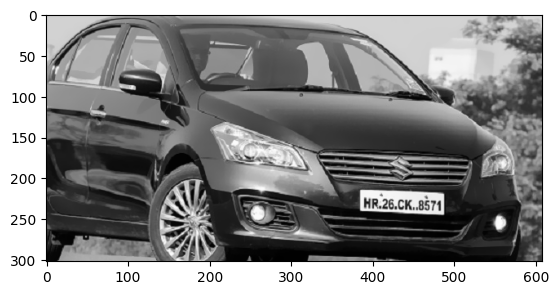

In [42]:
plt.imshow(blFilter)

In [43]:
# apply thresholding
ret, thresh1 = cv2.threshold(blFilter, 150, 210, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(blFilter, 100, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(blFilter, 100, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(blFilter, 168, 455, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(blFilter, 100, 255, cv2.THRESH_TOZERO_INV)

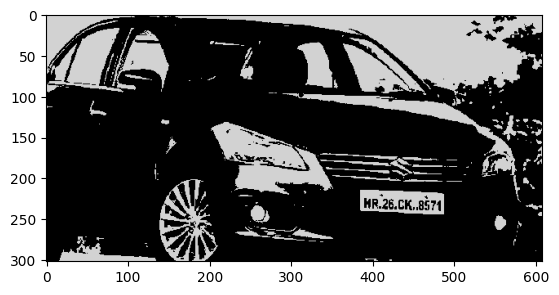

In [44]:
plt.imshow(thresh1)

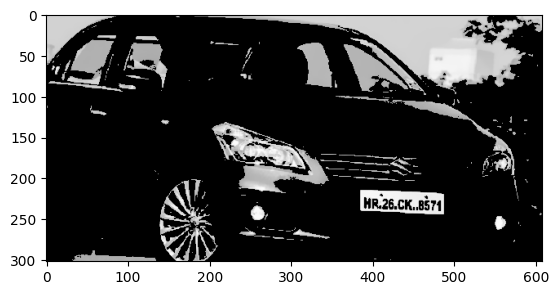

In [45]:
plt.imshow(thresh4)

In [46]:
blurImg = cv2.blur(thresh1,(2,2)) 

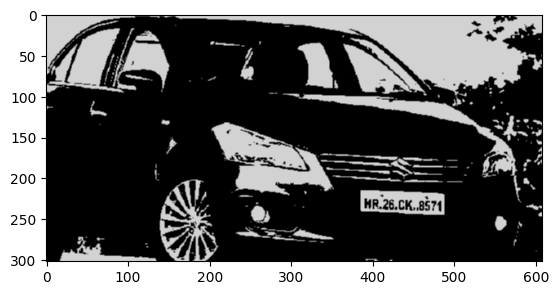

In [47]:
plt.imshow(blurImg)

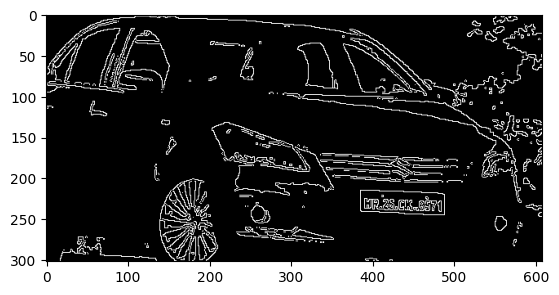

In [48]:
edged = cv2.Canny(blurImg,30,200)
# plt.imshow(edged)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [49]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]

In [50]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [51]:
location

array([[[385, 215]],

       [[386, 241]],

       [[488, 245]],

       [[486, 219]]], dtype=int32)

In [52]:
mask = np.zeros(gray_image.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

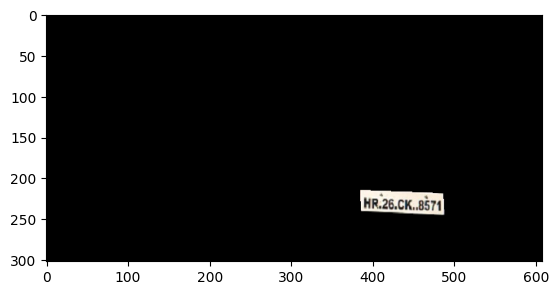

In [53]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [54]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_image[x1:x2+1, y1:y2+1]

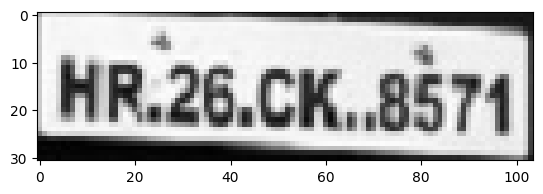

In [55]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [56]:
reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [57]:
result = reader.readtext(cropped_image, detail = 0)

''.join(result)

'HR 26.CK8571'